The state, ie: temperature at some position $\mathbf{x}$ at some time $t$.

$$ u(\mathbf{x},t) $$ 

The state derivative is the heat equation:

$$\frac{\partial u}{\partial t} = \alpha \nabla^2 u $$

where

$u$ = temperature

$\alpha$ = thermal diffusivity

$t$ = time

Only considering 1-dimension:

$$ \nabla^2 u = \frac{\partial^2 u}{\partial x^2} = \frac{u_{i+1}^m - 2u_i^m + u_{i-1}^m}{\Delta x^2}$$

where $m$ represents a given time, and $i$ represents spatial discretization. All together:

$$ \therefore \frac{\partial u}{\partial t} = \alpha \left( \frac{u_{i+1}^m - 2u_i^m + u_{i-1}^m}{\Delta x^2} \right) $$


The inital conditions will be defined as follows:

$ u(x,0) = 273.15$ for $ 0 \lt x \lt L $, where L is the total length of the rod

$ u(0, t) = 500 $ for all t

$ u(L, t) = 500 $ for all t

In [1]:
# Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.collections import LineCollection

def dudt(t, u, *args): # heat equation
    alpha = args[0]
    dx = args[1]
    A = args[2]
    u[0] = 500 # right boundary condition (constant temp)
    u[-1] = 500 # right boundary condition (constant temp)
    
    return (alpha/dx**2) * np.matmul(A, u.T)

# set up spatial discretization:
n_space = 200 # number of grid elements
x = np.linspace(0, 1, n_space) # spatial array
dx = 1./n_space # space-step

t0 = 0 # start time
tf = 5000 # stop time

# Initialize
u = np.ones((n_space))*273.15 # all elements of beam start at 20C
alpha = 6.4E-5 # [m^2/s] 6061-T6 src: https://www.engineersedge.com/heat_transfer/thermal_diffusivity_table_13953.htm



$$\frac{\partial \mathbf{u}}{\partial t} = \frac{\alpha}{\Delta x^2}
\begin{bmatrix}
-2 & 1 & 0 & \dots & 0\\
1 & -2 & 1 & \ddots & 0\\
0 & 1 & -2 & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & 0 & 0 & 1 & -2 
\end{bmatrix}
\begin{bmatrix}
u_0 \\
u_1 \\
u_2 \\
\vdots \\
u_n
\end{bmatrix}
$$







In [2]:
A = (np.diag(np.ones(n_space-1), k=1) + np.diag(-2*np.ones(n_space)) + np.diag(1*np.ones(n_space-1), k=-1)) # Spatial Matrix
res = sp.integrate.solve_ivp(dudt, (t0, tf), u, args=(alpha, dx, A)) # Default method is RK45
t = res.t # time array
y = res.y.transpose() # each row represents a given time step, each column represents the temperature at a given beam section

## Plotting

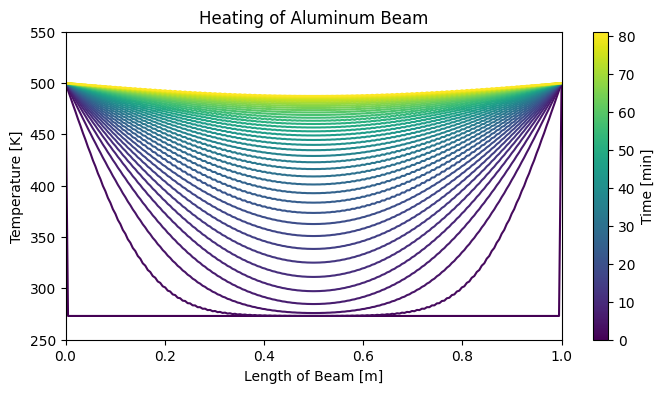

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

# The following creates a list of shape [time, array([x distances, temperatures])]
segs = []
for count, element in enumerate(y):
    if count % 400 == 0: # include only every 400th timestep
        segs.append(np.column_stack([x, element]))

# Creates a collection of lines for each time, "array" arg used to scale colorbar from t0 to tf
lines = LineCollection(segs, array=np.arange(t0, len(segs))/len(segs)*tf/60) 
ax.add_collection(lines)

# Formatting
axcb = fig.colorbar(lines)
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(250, 550)
axcb.set_label("Time [min]")
ax.set_ylabel("Temperature [K]")
ax.set_xlabel("Length of Beam [m]")
ax.set_title("Heating of Aluminum Beam")
plt.show()